In [7]:
import os 
from pyvi import ViTokenizer
from tqdm.notebook import tqdm
import numpy as np
import gensim

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in tqdm(dirs):
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
                lines = ViTokenizer.tokenize(lines)

                X.append(lines)
                y.append(path)

    return X, y

train_path = 'raw_data/'
X_data, y_data = get_data(train_path)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5219 [00:00<?, ?it/s]

  0%|          | 0/3159 [00:00<?, ?it/s]

  0%|          | 0/1820 [00:00<?, ?it/s]

  0%|          | 0/2552 [00:00<?, ?it/s]

  0%|          | 0/3868 [00:00<?, ?it/s]

  0%|          | 0/3384 [00:00<?, ?it/s]

  0%|          | 0/2898 [00:00<?, ?it/s]

  0%|          | 0/5298 [00:00<?, ?it/s]

  0%|          | 0/3080 [00:00<?, ?it/s]

  0%|          | 0/2481 [00:00<?, ?it/s]

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame({'text': X_data, 'label': y_data})
df

,text,label
0,thành_lập dự_án policy phòng_chống hiv aids vn...,Chinh tri Xa hoi
1,hơn khách đến vịnh nha trang theo trực_ban bộ_...,Chinh tri Xa hoi
2,tphcm khai_trương dịch_vụ lặn biển săn cá_mập ...,Chinh tri Xa hoi
3,du_lịch vn sẽ có tư_vấn nước_ngoài ông phạm từ...,Chinh tri Xa hoi
4,quy_chế tuyển_sinh không làm_tròn điểm từng bà...,Chinh tri Xa hoi
...,...,...
33754,điện_thoại_di_động tương_lai trông như thế_nào...,Vi tinh
33755,internet sẽ tăng_tốc lần trong tương_lai các f...,Vi tinh
33756,phần_lớn thế_giới thứ thất_bại với chính_phủ đ...,Vi tinh
33757,doom giành chiến_thắng kép trò_chơi hành_động ...,Vi tinh


In [26]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,label
0,thủ_tướng phan văn khải kết_thúc chuyến thăm m...,Chinh tri Xa hoi
1,học_bổng thụy sĩ vào ngày tại khách_sạn kim đô...,Chinh tri Xa hoi
2,cung thể_thao dưới nước quốc_gia thành bể_bơi ...,The thao
3,ukraina miền tây ăn_mừng miền đông thất_vọng t...,The gioi
4,bác_sĩ chỉ được kê đơn các thuốc thật cần_thiế...,Suc khoe
...,...,...
33754,quốc bảo nên biết mình biết người quốc bảo đừn...,Van hoa
33755,trốn cảnh đói_nghèo người phúc kiến bất_chấp h...,The gioi
33756,lê huy quang nghệ_sĩ đi guốc mộc tôi là người ...,Van hoa
33757,hội_đồng hlv quốc_gia chỉ ra sai_lầm của lđbđv...,The thao


In [27]:
#df.to_csv('dataset.csv', index=False)

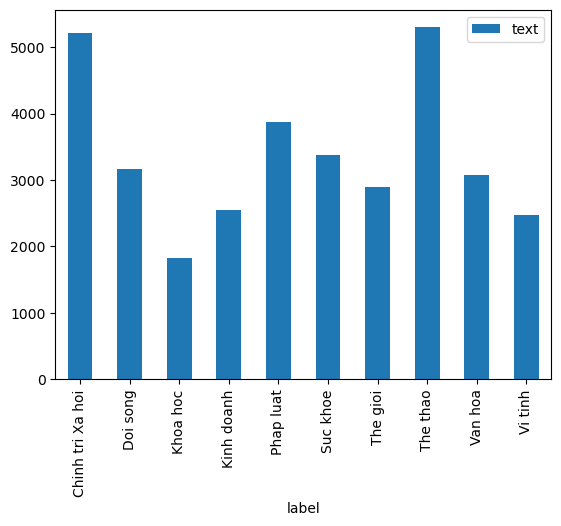

In [28]:
df[['label', 'text']].groupby(['label']).count().plot(kind='bar');

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['label'])

labels_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Labels mapping: ", labels_mapping)

df['label'] = le.transform(df['label'])

df

Labels mapping:  {'Chinh tri Xa hoi': 0, 'Doi song': 1, 'Khoa hoc': 2, 'Kinh doanh': 3, 'Phap luat': 4, 'Suc khoe': 5, 'The gioi': 6, 'The thao': 7, 'Van hoa': 8, 'Vi tinh': 9}


,text,label
0,thủ_tướng phan văn khải kết_thúc chuyến thăm m...,0
1,học_bổng thụy sĩ vào ngày tại khách_sạn kim đô...,0
2,cung thể_thao dưới nước quốc_gia thành bể_bơi ...,7
3,ukraina miền tây ăn_mừng miền đông thất_vọng t...,6
4,bác_sĩ chỉ được kê đơn các thuốc thật cần_thiế...,5
...,...,...
33754,quốc bảo nên biết mình biết người quốc bảo đừn...,8
33755,trốn cảnh đói_nghèo người phúc kiến bất_chấp h...,6
33756,lê huy quang nghệ_sĩ đi guốc mộc tôi là người ...,8
33757,hội_đồng hlv quốc_gia chỉ ra sai_lầm của lđbđv...,7
